In [48]:
import pandas as pd
import numpy as np
import collections
import re

In [49]:
f=open("corona.txt")
doc1=f.read()
f.close()

In [50]:
doc1

'The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. \n\nFurther, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission â€“transmission of the virus before the appearance of symptoms â€“ is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission. \n\nThe reproductive number â€“ the number of secondary infections generated from one infected individual â€“ is understood to 

In [51]:
l_doc = re.sub(r"[^a-zA-Z0-9]", " ", doc1.lower()).split()

In [52]:
l_doc

['the',
 'speed',
 'of',
 'transmission',
 'is',
 'an',
 'important',
 'point',
 'of',
 'difference',
 'between',
 'the',
 'two',
 'viruses',
 'influenza',
 'has',
 'a',
 'shorter',
 'median',
 'incubation',
 'period',
 'the',
 'time',
 'from',
 'infection',
 'to',
 'appearance',
 'of',
 'symptoms',
 'and',
 'a',
 'shorter',
 'serial',
 'interval',
 'the',
 'time',
 'between',
 'successive',
 'cases',
 'than',
 'covid',
 '19',
 'virus',
 'the',
 'serial',
 'interval',
 'for',
 'covid',
 '19',
 'virus',
 'is',
 'estimated',
 'to',
 'be',
 '5',
 '6',
 'days',
 'while',
 'for',
 'influenza',
 'virus',
 'the',
 'serial',
 'interval',
 'is',
 '3',
 'days',
 'this',
 'means',
 'that',
 'influenza',
 'can',
 'spread',
 'faster',
 'than',
 'covid',
 '19',
 'further',
 'transmission',
 'in',
 'the',
 'first',
 '3',
 '5',
 'days',
 'of',
 'illness',
 'or',
 'potentially',
 'pre',
 'symptomatic',
 'transmission',
 'transmission',
 'of',
 'the',
 'virus',
 'before',
 'the',
 'appearance',
 'of',
 

In [53]:
wordset=set(l_doc)

In [54]:
wordset

{'19',
 '2',
 '24',
 '3',
 '48',
 '5',
 '6',
 'a',
 'an',
 'and',
 'appear',
 'appearance',
 'are',
 'at',
 'be',
 'before',
 'between',
 'both',
 'can',
 'cases',
 'comparisons',
 'context',
 'contrast',
 'covid',
 'days',
 'difference',
 'difficult',
 'direct',
 'does',
 'driver',
 'estimated',
 'estimates',
 'faster',
 'first',
 'for',
 'from',
 'further',
 'generated',
 'has',
 'higher',
 'hours',
 'however',
 'illness',
 'important',
 'in',
 'incubation',
 'individual',
 'infected',
 'infection',
 'infections',
 'influenza',
 'interval',
 'is',
 'learning',
 'major',
 'making',
 'means',
 'median',
 'more',
 'not',
 'number',
 'of',
 'one',
 'onset',
 'or',
 'people',
 'period',
 'point',
 'potentially',
 'pre',
 'present',
 'prior',
 'reproductive',
 'secondary',
 'serial',
 'shed',
 'shorter',
 'specific',
 'speed',
 'spread',
 'successive',
 'symptom',
 'symptomatic',
 'symptoms',
 'than',
 'that',
 'the',
 'there',
 'this',
 'time',
 'to',
 'transmission',
 'two',
 'understood

In [55]:
def calculateBOW(wordset,l_doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in l_doc:
      tf_diz[word]=l_doc.count(word)
  return tf_diz

In [56]:
bow1 = calculateBOW(wordset,l_doc)
df_bow = pd.DataFrame([bow1])
df_bow.head()

,or,6,onset,hours,symptom,first,covid,does,than,days,...,understood,point,spread,shorter,an,shed,a,two,between,influenza
0,1,1,1,1,1,1,6,1,3,3,...,1,1,1,2,1,1,4,1,3,6


In [57]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [58]:
X = vectorizer.fit_transform([doc1])
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow_sklearn.head()

,19,24,48,an,and,appear,appearance,are,at,be,...,to,transmission,two,understood,very,virus,viruses,we,while,who
0,6,1,1,1,4,1,2,3,1,3,...,5,6,1,1,1,6,2,1,2,1


In [59]:
print(vectorizer.get_feature_names_out())

['19' '24' '48' 'an' 'and' 'appear' 'appearance' 'are' 'at' 'be' 'before'
 'between' 'both' 'can' 'cases' 'comparisons' 'context' 'contrast' 'covid'
 'days' 'difference' 'difficult' 'direct' 'does' 'driver' 'estimated'
 'estimates' 'faster' 'first' 'for' 'from' 'further' 'generated' 'has'
 'higher' 'hours' 'however' 'illness' 'important' 'in' 'incubation'
 'individual' 'infected' 'infection' 'infections' 'influenza' 'interval'
 'is' 'learning' 'major' 'making' 'means' 'median' 'more' 'not' 'number'
 'of' 'one' 'onset' 'or' 'people' 'period' 'point' 'potentially' 'pre'
 'present' 'prior' 'reproductive' 'secondary' 'serial' 'shed' 'shorter'
 'specific' 'speed' 'spread' 'successive' 'symptom' 'symptomatic'
 'symptoms' 'than' 'that' 'the' 'there' 'this' 'time' 'to' 'transmission'
 'two' 'understood' 'very' 'virus' 'viruses' 'we' 'while' 'who']


In [60]:
import nltk
#nltk.download('punkt')
import re
import numpy as np

f= open("corona.txt")
text=f.read()
f.close()
dataset = nltk.sent_tokenize(text)
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

In [61]:
print(dataset)

['the speed of transmission is an important point of difference between the two viruses ', 'influenza has a shorter median incubation period the time from infection to appearance of symptoms and a shorter serial interval the time between successive cases than covid 19 virus ', 'the serial interval for covid 19 virus is estimated to be 5 6 days while for influenza virus the serial interval is 3 days ', 'this means that influenza can spread faster than covid 19 ', 'further transmission in the first 3 5 days of illness or potentially pre symptomatic transmission â transmission of the virus before the appearance of symptoms â is a major driver of transmission for influenza ', 'in contrast while we are learning that there are people who can shed covid 19 virus 24 48 hours prior to symptom onset at present this does not appear to be a major driver of transmission ', 'the reproductive number â the number of secondary infections generated from one infected individual â is understood to be betw

In [62]:
word2count = {}
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [63]:
word2count

{'the': 11,
 'speed': 1,
 'of': 9,
 'transmission': 6,
 'is': 5,
 'an': 1,
 'important': 1,
 'point': 1,
 'difference': 1,
 'between': 3,
 'two': 1,
 'viruses': 2,
 'influenza': 6,
 'has': 1,
 'a': 4,
 'shorter': 2,
 'median': 1,
 'incubation': 1,
 'period': 1,
 'time': 3,
 'from': 2,
 'infection': 1,
 'to': 5,
 'appearance': 2,
 'symptoms': 2,
 'and': 4,
 'serial': 3,
 'interval': 3,
 'successive': 1,
 'cases': 1,
 'than': 3,
 'covid': 6,
 '19': 6,
 'virus': 6,
 'for': 6,
 'estimated': 1,
 'be': 3,
 '5': 3,
 '6': 1,
 'days': 3,
 'while': 2,
 '3': 2,
 'this': 2,
 'means': 1,
 'that': 2,
 'can': 2,
 'spread': 1,
 'faster': 1,
 'further': 1,
 'in': 2,
 'first': 1,
 'illness': 1,
 'or': 1,
 'potentially': 1,
 'pre': 1,
 'symptomatic': 1,
 'â': 4,
 'before': 1,
 'major': 2,
 'driver': 2,
 'contrast': 1,
 'we': 1,
 'are': 3,
 'learning': 1,
 'there': 1,
 'people': 1,
 'who': 1,
 'shed': 1,
 '24': 1,
 '48': 1,
 'hours': 1,
 'prior': 1,
 'symptom': 1,
 'onset': 1,
 'at': 1,
 'present': 1,
 'd

In [64]:
words

['however',
 'estimates',
 'for',
 'both',
 'covid',
 '19',
 'and',
 'influenza',
 'viruses',
 'are',
 'very',
 'context',
 'and',
 'time',
 'specific',
 'making',
 'direct',
 'comparisons',
 'more',
 'difficult']

In [65]:
len(words)

20

In [66]:
vocab_size = len(wordset)
embed_dim = 10
context_size = 4

In [67]:
word_to_ix = {word: i for i, word in enumerate(wordset)}
ix_to_word = {i: word for i, word in enumerate(wordset)}

In [68]:
word_to_ix

{'or': 0,
 '6': 1,
 'onset': 2,
 'hours': 3,
 'symptom': 4,
 'first': 5,
 'covid': 6,
 'does': 7,
 'than': 8,
 'days': 9,
 'serial': 10,
 'further': 11,
 '3': 12,
 'before': 13,
 'comparisons': 14,
 'number': 15,
 'in': 16,
 'appearance': 17,
 'interval': 18,
 'means': 19,
 'specific': 20,
 'and': 21,
 'more': 22,
 'one': 23,
 '2': 24,
 'estimates': 25,
 'who': 26,
 '5': 27,
 'both': 28,
 'of': 29,
 'period': 30,
 'pre': 31,
 'be': 32,
 'potentially': 33,
 'we': 34,
 'driver': 35,
 'difficult': 36,
 'contrast': 37,
 'estimated': 38,
 'while': 39,
 '19': 40,
 'however': 41,
 'learning': 42,
 'reproductive': 43,
 'very': 44,
 'major': 45,
 'making': 46,
 'generated': 47,
 'symptoms': 48,
 'virus': 49,
 'important': 50,
 'has': 51,
 'incubation': 52,
 'present': 53,
 'infections': 54,
 'appear': 55,
 'from': 56,
 'higher': 57,
 'at': 58,
 'difference': 59,
 'symptomatic': 60,
 'infected': 61,
 'viruses': 62,
 'not': 63,
 'successive': 64,
 'direct': 65,
 'this': 66,
 'median': 67,
 'for':

In [69]:
ix_to_word

{0: 'or',
 1: '6',
 2: 'onset',
 3: 'hours',
 4: 'symptom',
 5: 'first',
 6: 'covid',
 7: 'does',
 8: 'than',
 9: 'days',
 10: 'serial',
 11: 'further',
 12: '3',
 13: 'before',
 14: 'comparisons',
 15: 'number',
 16: 'in',
 17: 'appearance',
 18: 'interval',
 19: 'means',
 20: 'specific',
 21: 'and',
 22: 'more',
 23: 'one',
 24: '2',
 25: 'estimates',
 26: 'who',
 27: '5',
 28: 'both',
 29: 'of',
 30: 'period',
 31: 'pre',
 32: 'be',
 33: 'potentially',
 34: 'we',
 35: 'driver',
 36: 'difficult',
 37: 'contrast',
 38: 'estimated',
 39: 'while',
 40: '19',
 41: 'however',
 42: 'learning',
 43: 'reproductive',
 44: 'very',
 45: 'major',
 46: 'making',
 47: 'generated',
 48: 'symptoms',
 49: 'virus',
 50: 'important',
 51: 'has',
 52: 'incubation',
 53: 'present',
 54: 'infections',
 55: 'appear',
 56: 'from',
 57: 'higher',
 58: 'at',
 59: 'difference',
 60: 'symptomatic',
 61: 'infected',
 62: 'viruses',
 63: 'not',
 64: 'successive',
 65: 'direct',
 66: 'this',
 67: 'median',
 68: 'f

In [70]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['however', 'estimates', 'both', 'covid'], 'for'), (['estimates', 'for', 'covid', '19'], 'both'), (['for', 'both', '19', 'and'], 'covid'), (['both', 'covid', 'and', 'influenza'], '19'), (['covid', '19', 'influenza', 'viruses'], 'and')]


In [71]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [72]:
embeddings

array([[2.29633185e-01, 8.89631151e-01, 9.56260228e-01, 8.41966170e-01,
        4.89724267e-01, 5.81578522e-01, 3.76407100e-01, 2.76300934e-01,
        3.12578845e-01, 5.70384020e-01],
       [7.47909598e-01, 5.27645220e-01, 7.75689772e-01, 1.61452287e-01,
        9.65985857e-01, 3.10552352e-01, 2.77740247e-01, 9.26931160e-01,
        4.67820266e-01, 5.57182447e-01],
       [8.31351288e-01, 5.53906718e-01, 1.94974641e-01, 8.94897436e-01,
        2.12779836e-01, 4.21612384e-01, 5.24627866e-01, 2.84221154e-01,
        9.42213723e-01, 2.12964941e-01],
       [7.63031763e-01, 6.13602872e-01, 4.15528243e-01, 3.15879601e-01,
        4.47636202e-01, 3.47228958e-01, 5.66563186e-01, 4.22857778e-01,
        5.70773259e-01, 7.56112233e-01],
       [9.40156788e-01, 4.58240181e-01, 6.60409949e-01, 4.71924930e-01,
        2.72679387e-02, 3.16803778e-01, 9.67432929e-01, 3.79514906e-01,
        8.41057068e-02, 6.12404063e-01],
       [6.71286724e-01, 1.75725999e-01, 6.18180753e-01, 5.99979028e-01,
   

In [73]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [74]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [75]:
import tensorflow as tf
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

In [76]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- out + softmax) / logits.shape[0]

In [77]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)

    return m, n, o

In [78]:
def backward(preds, theta, target_idxs):
    m, n, o = preds

    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)

    return dw

In [79]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [80]:
theta = np.random.uniform(-1, 1, ( context_size * embed_dim, vocab_size))

In [81]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)

        epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

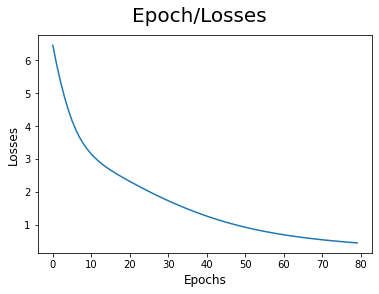

In [82]:
import matplotlib.pyplot as plt
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [83]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]

    return word
predict(['is', 'not', 'one', 'first'])

'comparisons'

In [84]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1

    return (1 - (wrong / len(data)))
accuracy()

1.0